# Testbench for SLMLab.dll

Author(s): *Martin Fränzl*


## Required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ctypes import *
from skimage.io import imread
from skimage.transform import resize
from skimage.util import invert 

## Load DLL

In [2]:
dll = CDLL('SLMLab/x64/Debug/SLMLab.dll')

In [3]:
startCUDA = dll.startCUDA
generatePhase = dll.generatePhase
stopCUDA = dll.stopCUDA

## Start CUDA

In [4]:
pSLMstart = np.zeros((512*512)) # dtype=np.uint16
pSLMstart = np.copy(pSLMstart).astype(c_float) 

startCUDA.argtypes = [POINTER(c_float), c_int]
startCUDA(pSLMstart.ctypes.data_as(POINTER(c_float)), c_int(0)) #c_int(0)

0

## Open Image

In [5]:
image = imread('Image.png')
image = resize(invert(image[:,:,0]), (512, 512), anti_aliasing=False)

C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


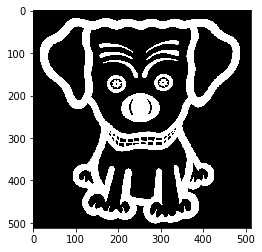

In [6]:
plt.imshow(image, cmap='gray');

## Generate Phase

In [7]:
pSLM = np.zeros((512*512)) # dtype=np.uint16
pSLM = np.copy(pSLM).astype(c_uint16) 

dAmplitude = image.reshape((512*512))/image.max() # desired amplitude
dAmplitude = np.copy(dAmplitude).astype(c_float)

In [8]:
generatePhase.argtypes = [POINTER(c_uint16), POINTER(c_float), c_int]
generatePhase(pSLM.ctypes.data_as(POINTER(c_uint16)), dAmplitude.ctypes.data_as(POINTER(c_float)), 10)

0

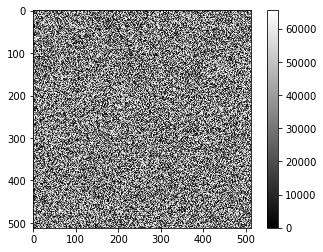

In [9]:
plt.imshow(pSLM.reshape(512, 512), cmap='gray');
plt.colorbar()

In [10]:
from scipy.fftpack import ifftn,fftn

In [11]:
phase = pSLM.reshape(512, 512)
phase = 2*np.pi*phase/65535 - np.pi

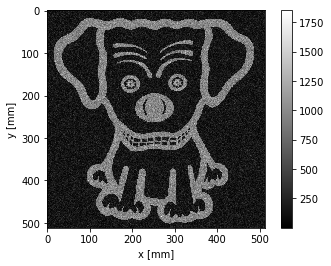

In [12]:
#dimx = dimy = 532e-9*0.3/15e-6*1e3 # wavelength*f_lense/pixel_size

im = fftn(np.exp(1j*phase))
plt.imshow(abs(im), cmap='gray') # extent=[0, dimx, 0, dimy], 
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.colorbar()

## Free DLL

In [13]:
kernel32 = WinDLL('kernel32', use_last_error=True)    
kernel32.FreeLibrary.argtypes = [wintypes.HMODULE]

kernel32.FreeLibrary(dll._handle)

1